In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [10]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape((60000,28,28)).astype('float32')/255
test_images=test_images.reshape((10000,28,28)).astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
input_shape = (28,28)
inputs = Input(shape=input_shape)
rnn_layer = LSTM(128)(inputs)
outputs = Dense(10,activation='softmax')(rnn_layer)
model = Model(inputs=inputs,outputs=outputs)

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               80384     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81674 (319.04 KB)
Trainable params: 81674 (319.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images,train_labels,validation_split=0.2,epochs=5,batch_size=64)

Epoch 1/5
750/750 [==============================] - 7s 6ms/step - loss: 0.4575 - accuracy: 0.8509 - val_loss: 0.1704 - val_accuracy: 0.9466
Epoch 2/5
750/750 [==============================] - 5s 6ms/step - loss: 0.1434 - accuracy: 0.9570 - val_loss: 0.1267 - val_accuracy: 0.9605
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0957 - accuracy: 0.9708 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0758 - accuracy: 0.9771 - val_loss: 0.0781 - val_accuracy: 0.9783
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.0631 - val_accuracy: 0.9811


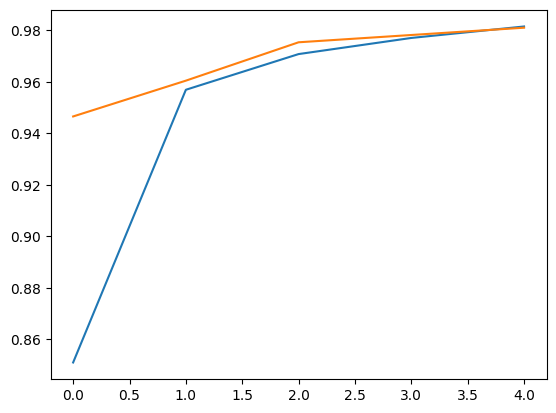

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

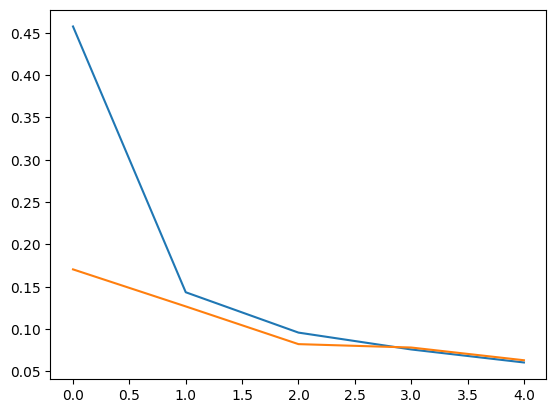

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [17]:
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
import numpy as np
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([7, 2, 1, ..., 4, 5, 6])

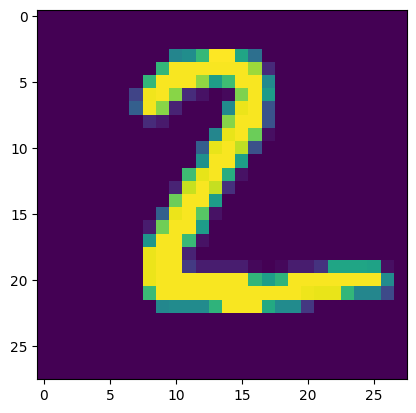

In [19]:
plt.imshow(test_images[1])

In [20]:
import numpy as np
y_test = np.argmax(test_labels,axis=1)
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
y_test[1]

2